## Imports and global settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

## 1. Data Analysis (Framingham Heart Study Dataset)

In [2]:
df = pd.read_csv("framingham.csv")
len_raw = df.shape[0]

In [3]:
df.shape

(4240, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['glucose'].fillna(df['glucose'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)
df['education'].fillna(df['education'].median(),inplace=True)

In [8]:
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(4187, 16)

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
print("Size of dataset after preprocessing (before outlier removal): {:.2f}%".format((df.shape[0]/len_raw)*100))

Size of dataset after preprocessing (before outlier removal): 98.75%


In [12]:
df.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39       4.00              0        0.00    0.00                0   
1     0   46       2.00              0        0.00    0.00                0   
2     1   48       1.00              1       20.00    0.00                0   
3     0   61       3.00              1       30.00    0.00                0   
4     0   46       3.00              1       23.00    0.00                0   
5     0   43       2.00              0        0.00    0.00                0   
6     0   63       1.00              0        0.00    0.00                0   
7     0   45       2.00              1       20.00    0.00                0   
8     1   52       1.00              0        0.00    0.00                0   
9     1   43       1.00              1       30.00    0.00                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  heartRate  glucose  \
0             0         0   195.00 106.00  70.00 26.97      80.00    77.00   
1             0         0   250.00 121.00  81.00 28.73      95.00    76.00   
2             0         0   245.00 127.50  80.00 25.34      75.00    70.00   
3             1         0   225.00 150.00  95.00 28.58      65.00   103.00   
4             0         0   285.00 130.00  84.00 23.10      85.00    85.00   
5             1         0   228.00 180.00 110.00 30.30      77.00    99.00   
6             0         0   205.00 138.00  71.00 33.11      60.00    85.00   
7             0         0   313.00 100.00  71.00 21.68      79.00    78.00   
8             1         0   260.00 141.50  89.00 26.36      76.00    79.00   
9             1         0   225.00 162.00 107.00 23.61      93.00    88.00   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [13]:
df.describe(include='all').transpose()

count   mean   std    min    25%    50%    75%    max
male            4,187.00   0.43  0.50   0.00   0.00   0.00   1.00   1.00
age             4,187.00  49.53  8.56  32.00  42.00  49.00  56.00  70.00
education       4,187.00   1.98  1.01   1.00   1.00   2.00   3.00   4.00
currentSmoker   4,187.00   0.49  0.50   0.00   0.00   0.00   1.00   1.00
cigsPerDay      4,187.00   8.95 11.90   0.00   0.00   0.00  20.00  70.00
BPMeds          4,187.00   0.03  0.17   0.00   0.00   0.00   0.00   1.00
prevalentStroke 4,187.00   0.01  0.08   0.00   0.00   0.00   0.00   1.00
prevalentHyp    4,187.00   0.31  0.46   0.00   0.00   0.00   1.00   1.00
diabetes        4,187.00   0.03  0.16   0.00   0.00   0.00   0.00   1.00
totChol         4,187.00 236.62 44.22 107.00 206.00 234.00 262.00 696.00
sysBP           4,187.00 132.29 21.98  83.50 117.00 128.00 143.50 295.00
diaBP           4,187.00  82.89 11.88  48.00  75.00  82.00  90.00 142.50
BMI             4,187.00  25.80  4.07  15.54  23.08  25.40  28.04  56.80
heartRate       4,187.00  75.88 12.05  44.00  68.00  75.00  83.00 143.00
glucose         4,187.00  81.59 22.93  40.00  72.00  78.00  85.00 394.00
TenYearCHD      4,187.00   0.15  0.36   0.00   0.00   0.00   0.00   1.00

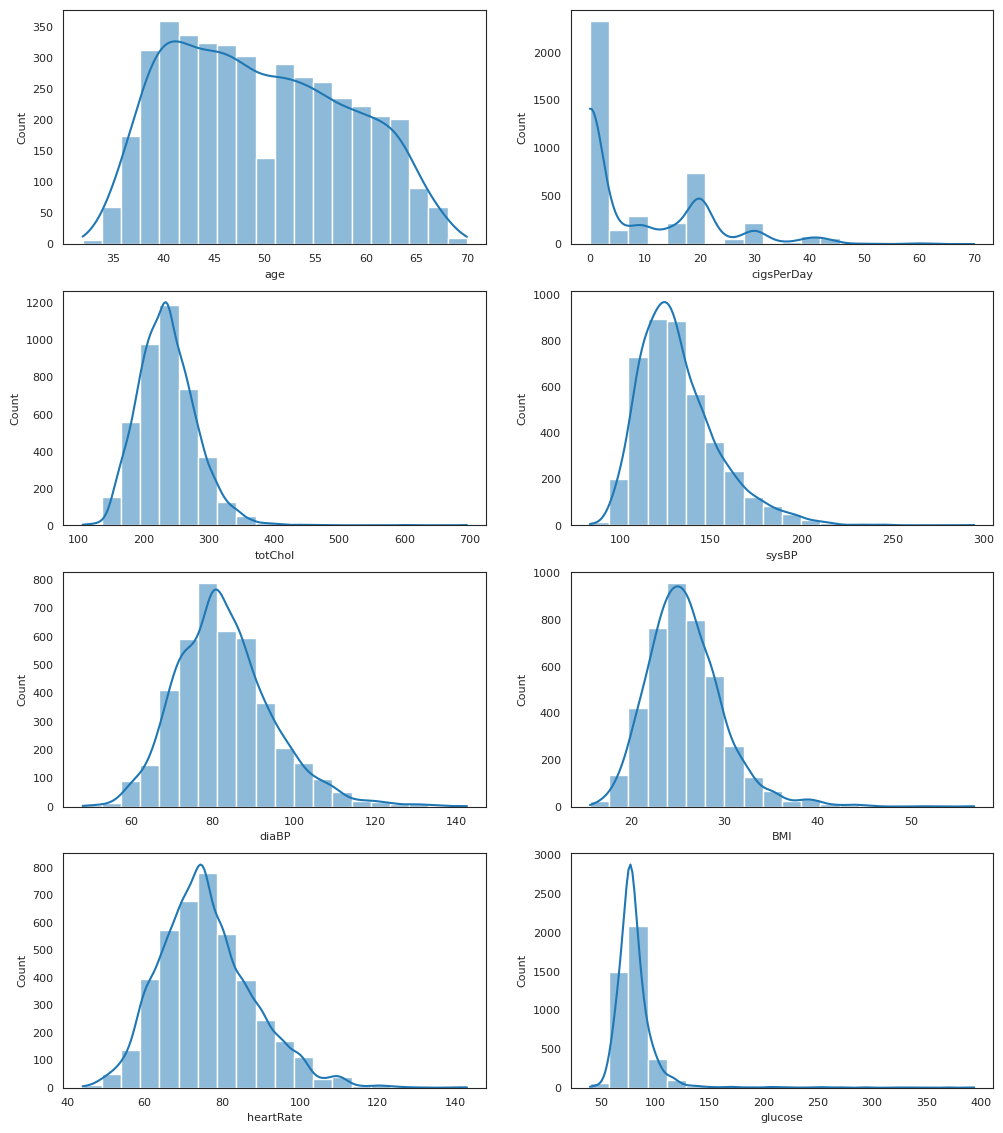

In [14]:
sns.set_style("white")

bns = 20

fig, axes = plt.subplots(4, 2, figsize=(12,14))
sns.histplot(data=df, x="age", kde=True, bins=bns, ax=axes[0,0])
sns.histplot(data=df, x="cigsPerDay", kde=True, bins=bns, ax=axes[0,1])
sns.histplot(data=df, x="totChol", kde=True, bins=bns, ax=axes[1,0])
sns.histplot(data=df, x="sysBP", kde=True, bins=bns, ax=axes[1,1])
sns.histplot(data=df, x="diaBP", kde=True, bins=bns, ax=axes[2,0])
sns.histplot(data=df, x="BMI", kde=True, bins=bns, ax=axes[2,1])
sns.histplot(data=df, x="heartRate", kde=True, bins=bns, ax=axes[3,0])
sns.histplot(data=df, x="glucose", kde=True, bins=bns, ax=axes[3,1]);

fig.savefig("CHDdist.png", dpi=150) 

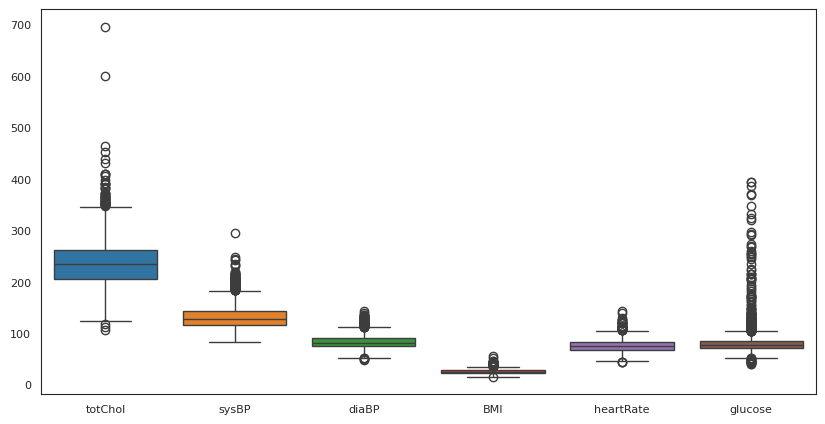

In [15]:
df_fc = df[["totChol","sysBP","diaBP","BMI","heartRate","glucose"]].copy()
plt.figure(figsize=(10,5), facecolor='w')
sns.boxplot(data=df_fc)
plt.savefig("CHDboxplot.png", dpi=150)

In [16]:
def remove_outliers(df_in, threshold):

    tr = threshold
    df = df_in.copy(deep=True)

    z1 = np.abs(stats.zscore(df['totChol']))
    z2 = np.abs(stats.zscore(df['sysBP']))
    z3 = np.abs(stats.zscore(df['diaBP']))
    z4 = np.abs(stats.zscore(df['BMI']))
    z5 = np.abs(stats.zscore(df['heartRate']))
    z6 = np.abs(stats.zscore(df['glucose']))
    
    out1_idx = pd.Series(z1).where(z1 > tr).dropna().index.tolist()
    out2_idx = pd.Series(z2).where(z2 > tr).dropna().index.tolist()
    out3_idx = pd.Series(z3).where(z3 > tr).dropna().index.tolist()
    out4_idx = pd.Series(z4).where(z4 > tr).dropna().index.tolist()
    out5_idx = pd.Series(z5).where(z5 > tr).dropna().index.tolist()
    out6_idx = pd.Series(z6).where(z6 > tr).dropna().index.tolist()
    
    outlier_row_idx = out1_idx + out2_idx + out3_idx + out4_idx + out5_idx + out6_idx
    
    return df.drop(index=outlier_row_idx)

In [17]:
# apply outlier removal (based on Z-score)
df = remove_outliers(df, 3)
df.shape

(3988, 16)

In [18]:
print("Size of dataset after preprocessing (after outlier removal): {:.2f}%".format((df.shape[0]/len_raw)*100))

Size of dataset after preprocessing (after outlier removal): 94.06%


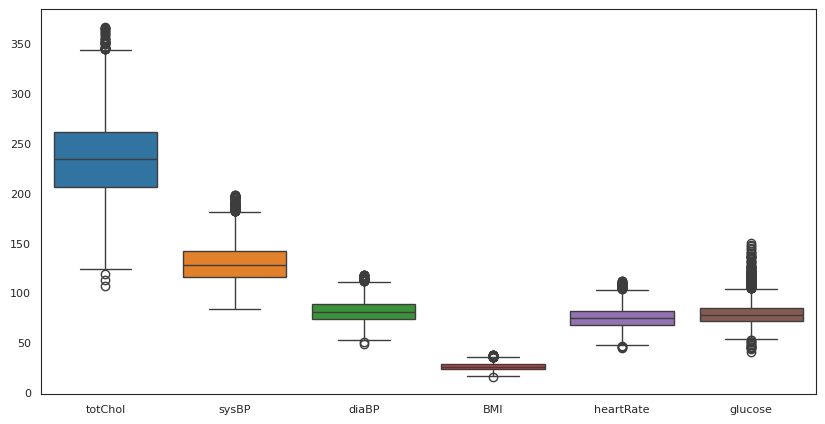

In [19]:
df_fc = df[["totChol","sysBP","diaBP","BMI","heartRate","glucose"]].copy()
plt.figure(figsize=(10,5), facecolor='w')
sns.boxplot(data=df_fc)
plt.show()

<Figure size 1000x1200 with 0 Axes>

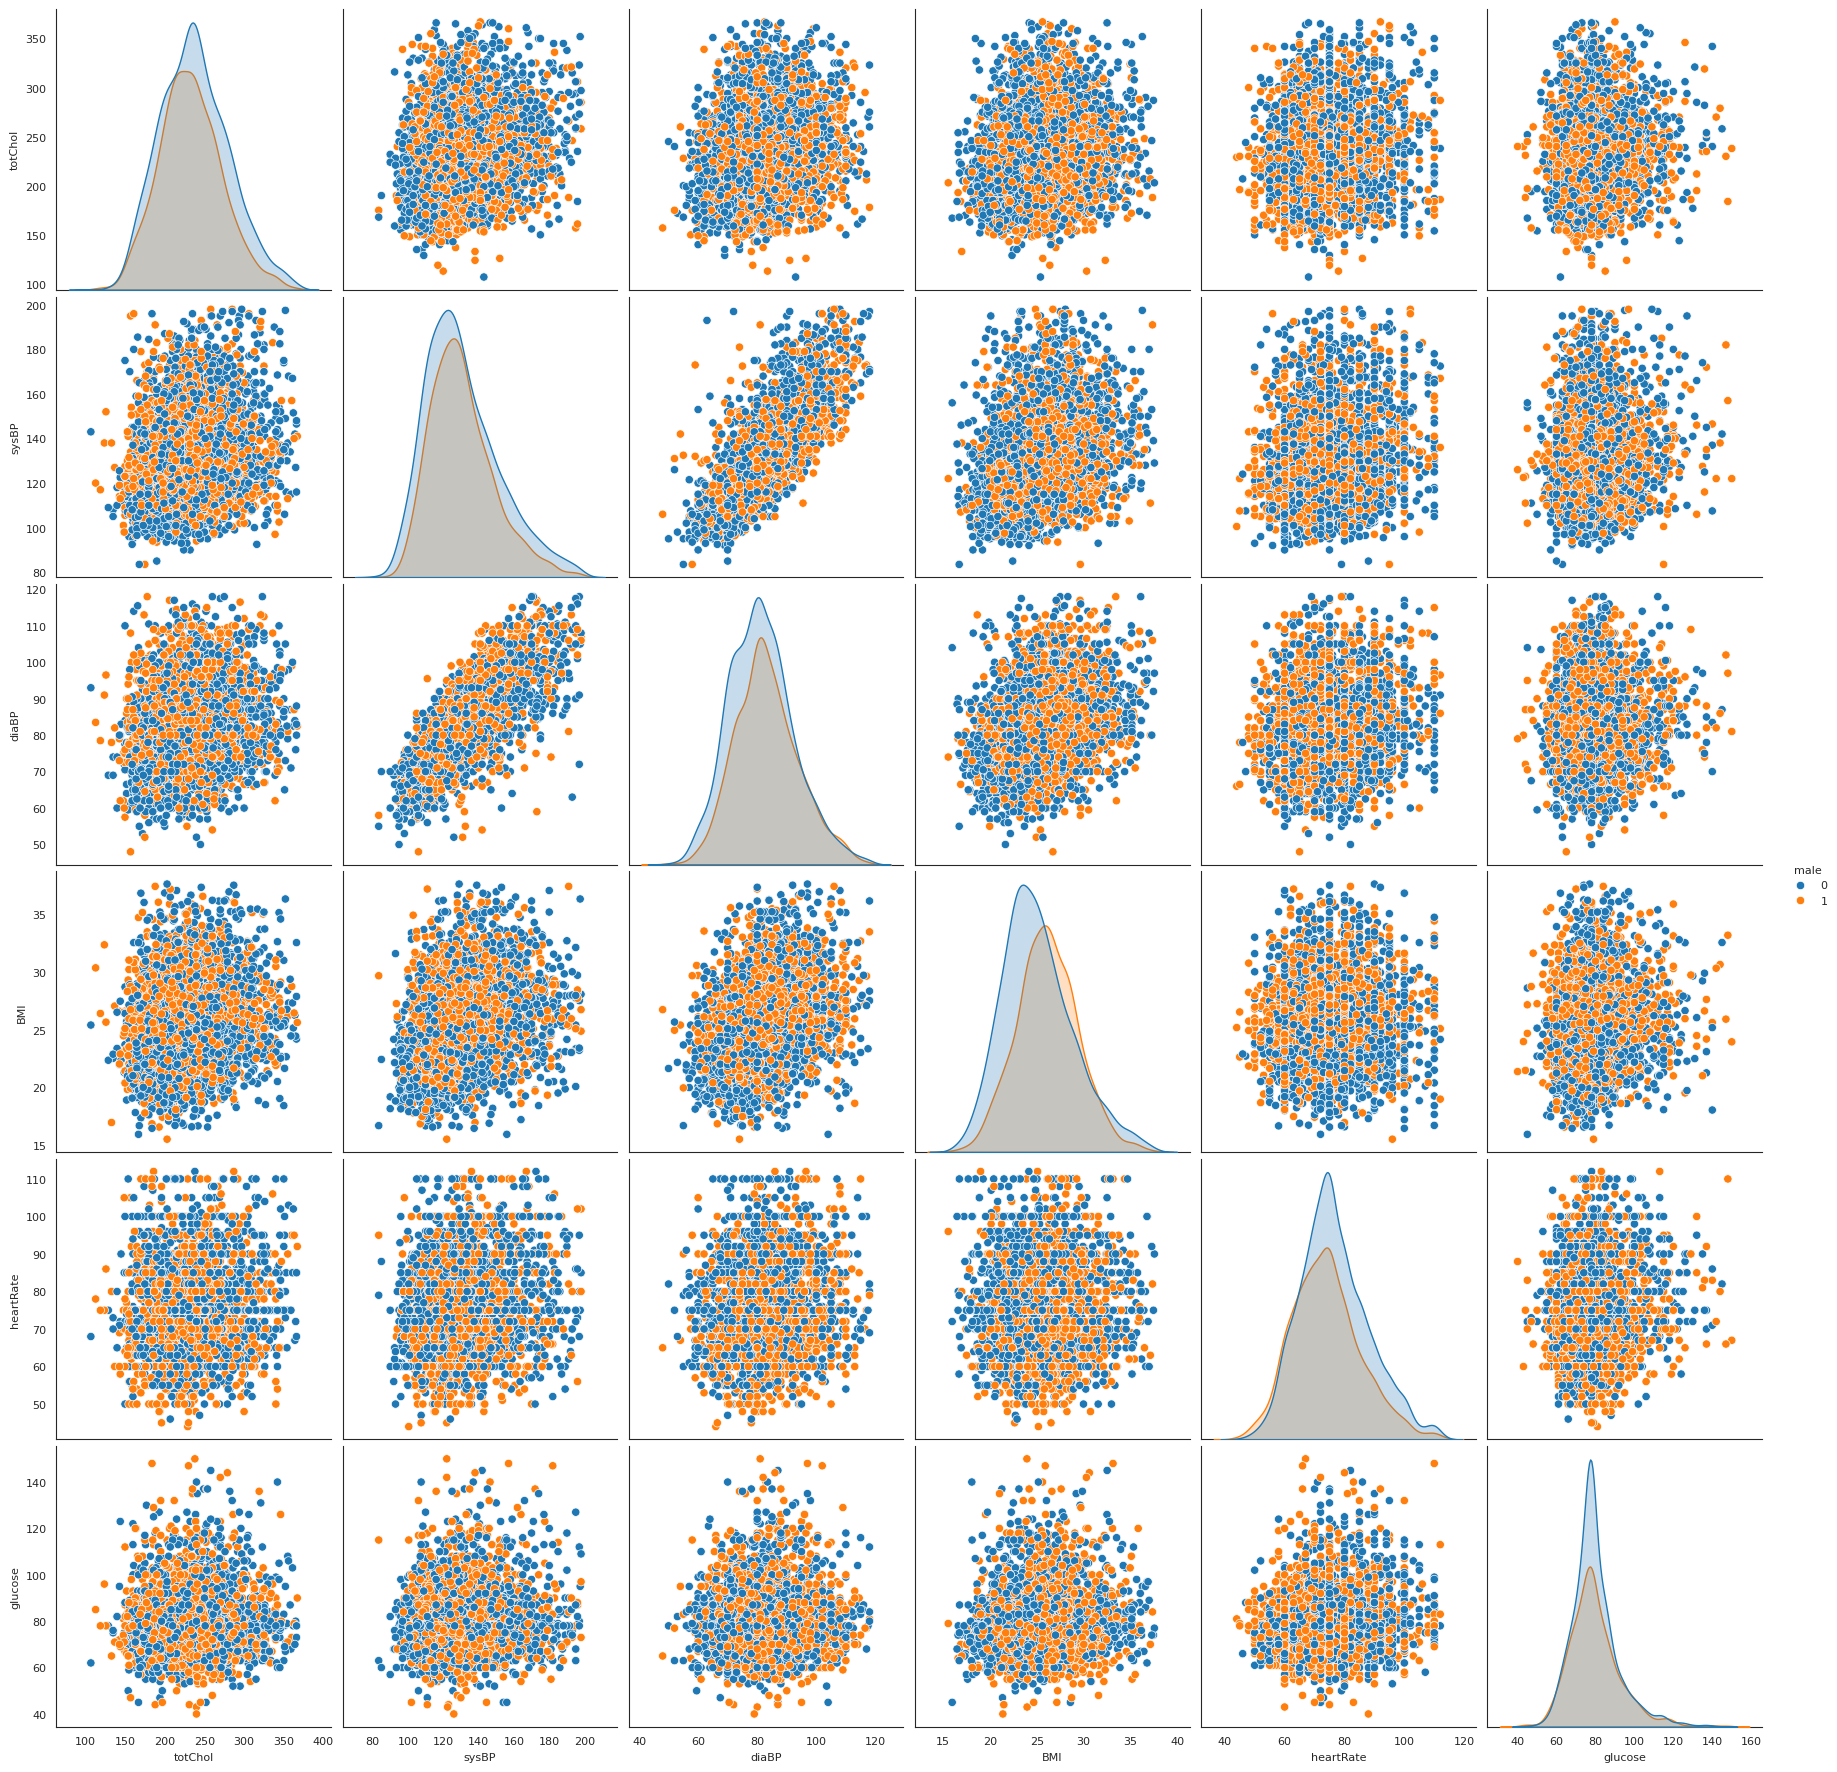

In [20]:
df_f = df[["male","totChol","sysBP","diaBP","BMI","heartRate","glucose"]].copy()
plt.figure(figsize=(10,12))
sns.pairplot(df_f, hue="male", height=3)
plt.savefig("CHDpairplot.png", dpi=150)

In [21]:
df['male'].value_counts()

male
0    2245
1    1743
Name: count, dtype: int64

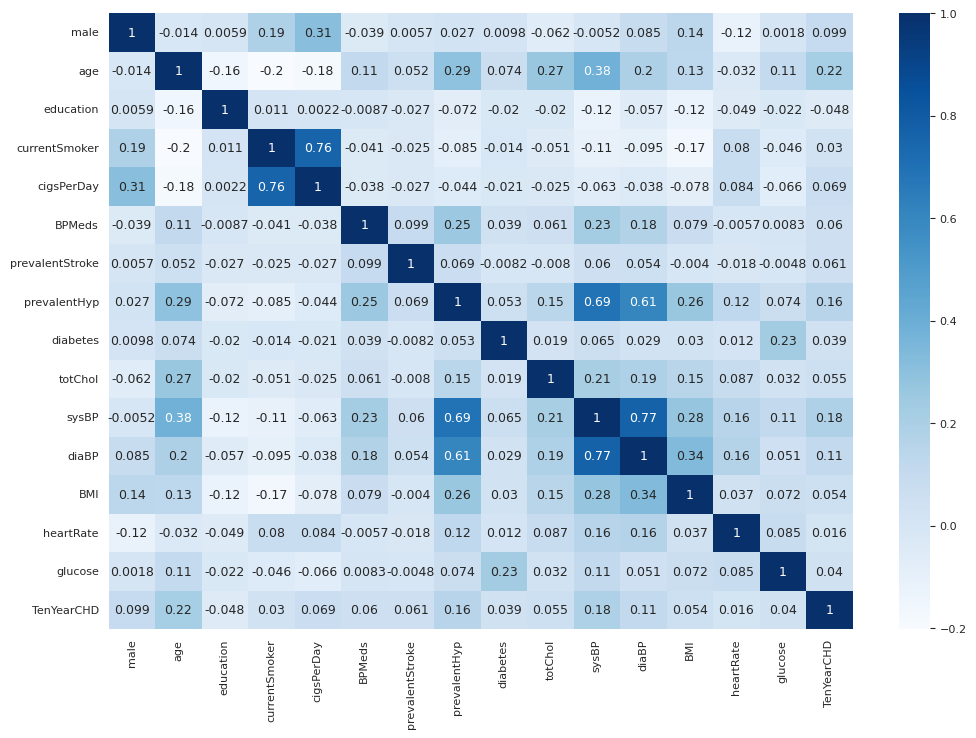

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cbar=True,annot=True,annot_kws={"fontsize":9},cmap='Blues')
plt.savefig("CHDcorr.png", dpi=150)

In [23]:
# save dataframe after data preprocessing
df.to_csv('framingham_clean.csv', index=False)

## 2. Class Re-Balancing, Feature Scaling and Test and Training split

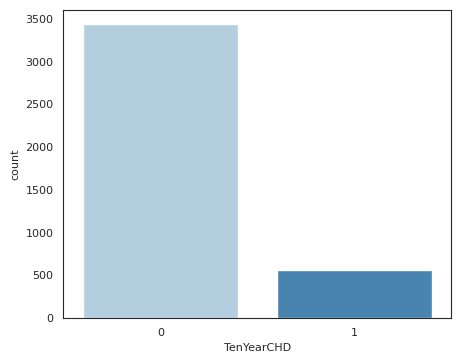

In [24]:
sns.countplot(x="TenYearCHD", hue="TenYearCHD", data=df, legend=False, palette="Blues")
plt.savefig("CHDtarget.png", dpi=150)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [26]:
print('Original  : %s' % Counter(y))
print('Resampled : %s' % Counter(y_res))

Original  : Counter({0: 3432, 1: 556})
Resampled : Counter({0: 3432, 1: 3432})


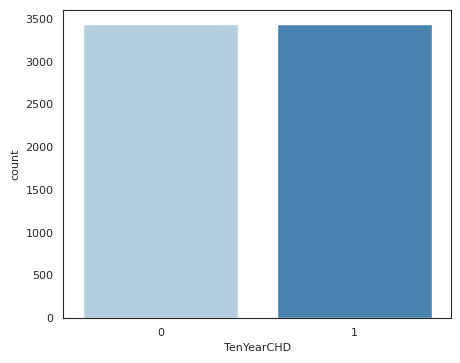

In [27]:
sns.countplot(x="TenYearCHD", hue="TenYearCHD", data=y_res.to_frame(), legend=False, palette="Blues")
plt.show()

In [28]:
scaler = StandardScaler()
scaler.set_output(transform="pandas")
X_res = scaler.fit_transform(X_res)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

## 3. Machine Learing Models

In [29]:
def plot_conf_matrix(y_test, predictor, model):
    ytest = y_test
    pred = predictor
    cm = confusion_matrix(ytest, pred)
    conf_matrix = pd.DataFrame(data = cm, 
        					   columns = ['Predicted (0)', 'Predicted (1)'], 
        					   index =['Actual (0)', 'Actual (1)'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues");
    plt.savefig("CHDconf_matrix_{}.png".format(model), dpi=150)
    
    false_negative_rate = cm[1][0]/(cm[1][0]+cm[1][1])
    false_positive_rate = cm[0][1]/(cm[0][1]+cm[0][0])
    
    return false_negative_rate, false_positive_rate 

In [30]:
def get_scores(classifier, train, target, pred):
    f1 = f1_score(target, pred)
    acc = accuracy_score(target, pred)
    probs = classifier.predict_proba(train)
    probs = probs[:, 1]
    auc = roc_auc_score(target, probs)

    return acc, f1, auc

In [31]:
# Global parameters across all machine learning models
cross_val = 5
vbose = 1

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

logreg = LogisticRegressionCV(cv=cross_val).fit(X_train, y_train)

In [33]:
print("{:,.2f}".format(logreg.score(X_test, y_test)))

0.67


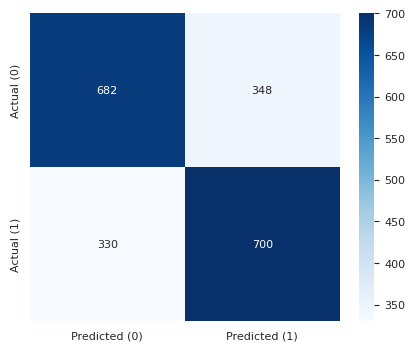

In [34]:
logreg_pred = logreg.predict(X_test)
lr_fnr, lr_fpr = plot_conf_matrix(y_test, logreg_pred, "LR")

In [35]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      1030
           1       0.67      0.68      0.67      1030

    accuracy                           0.67      2060
   macro avg       0.67      0.67      0.67      2060
weighted avg       0.67      0.67      0.67      2060



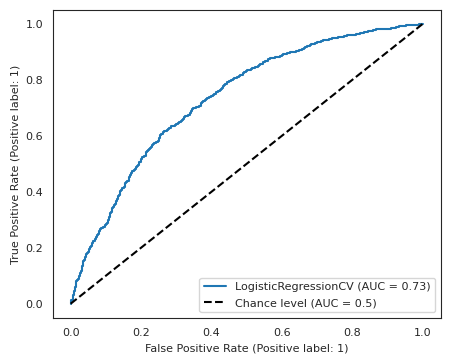

In [36]:
logreg_disp = RocCurveDisplay.from_estimator(logreg, X_test, y_test, plot_chance_level=True)

## k-Nearest Neighbors (kNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,9,2)}
knn_gscv = GridSearchCV(knn, param_grid, cv=cross_val, verbose=vbose)
knn_gscv.fit(X_train, y_train)

knn.fit(X_train, y_train)

knn_gscv.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'n_neighbors': 1}

In [38]:
print("{:,.2f}".format(knn.score(X_test, y_test)))

0.76


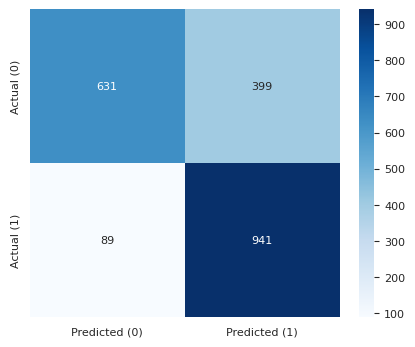

In [39]:
knn_pred = knn.predict(X_test)
knn_fnr, knn_fpr = plot_conf_matrix(y_test, knn_pred, "KNN")

In [40]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1030
           1       0.70      0.91      0.79      1030

    accuracy                           0.76      2060
   macro avg       0.79      0.76      0.76      2060
weighted avg       0.79      0.76      0.76      2060



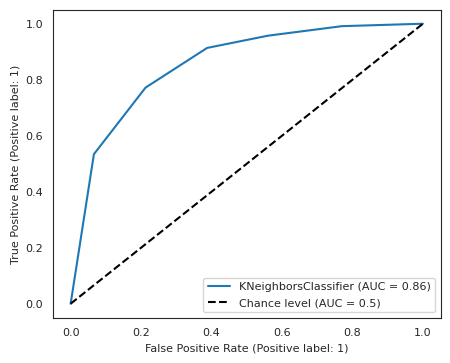

In [41]:
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, plot_chance_level=True)

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 500, 1000]}

forest = RandomForestClassifier()
rf_gscv = GridSearchCV(estimator=forest, param_grid=param_grid, cv=cross_val, verbose=vbose)
rf_gscv.fit(X_train, y_train)

forest.fit(X_train, y_train)

rf_gscv.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'n_estimators': 500}

In [43]:
print("{:,.2f}".format(forest.score(X_test, y_test)))

0.92


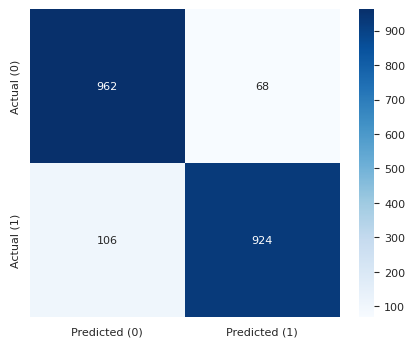

In [44]:
rf_pred = forest.predict(X_test)
rf_fnr, rf_fpr = plot_conf_matrix(y_test, rf_pred, "RF")

In [45]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1030
           1       0.93      0.90      0.91      1030

    accuracy                           0.92      2060
   macro avg       0.92      0.92      0.92      2060
weighted avg       0.92      0.92      0.92      2060



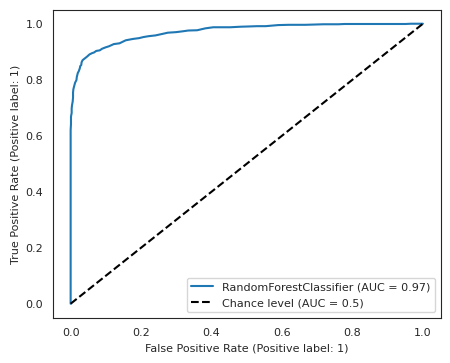

In [46]:
rf_disp = RocCurveDisplay.from_estimator(forest, X_test, y_test, plot_chance_level=True)

## Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

svm = SVC(kernel='rbf', probability=True)
svm_gscv = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cross_val, verbose=vbose)
svm_gscv.fit(X_train, y_train)

svm.fit(X_train, y_train)

svm_gscv.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'C': 10, 'gamma': 1}

In [48]:
print("{:,.2f}".format(svm.score(X_test, y_test)))

0.73


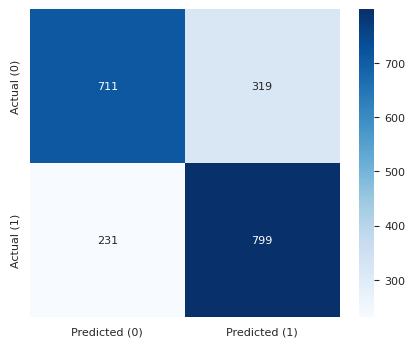

In [49]:
svm_pred = svm.predict(X_test)
svm_fnr, svm_fpr = plot_conf_matrix(y_test, svm_pred, "SVM")

In [50]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1030
           1       0.71      0.78      0.74      1030

    accuracy                           0.73      2060
   macro avg       0.73      0.73      0.73      2060
weighted avg       0.73      0.73      0.73      2060



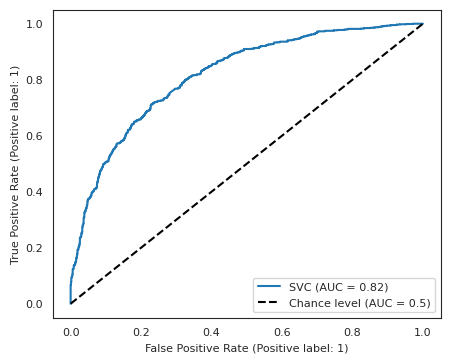

In [51]:
svm_disp = RocCurveDisplay.from_estimator(svm, X_test, y_test, plot_chance_level=True)

## Artificial Neural Network (ANN)

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [[15], [15,15], [15,15,15], [50,50], [50,50,50,50]]}

mlp = MLPClassifier()
mlp_gscv = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=cross_val, verbose=vbose)
mlp_gscv.fit(X_train, y_train)

mlp.fit(X_train, y_train)

mlp_gscv.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'hidden_layer_sizes': [50, 50, 50, 50]}

In [53]:
print("{:,.2f}".format(mlp.score(X_test, y_test)))

0.75


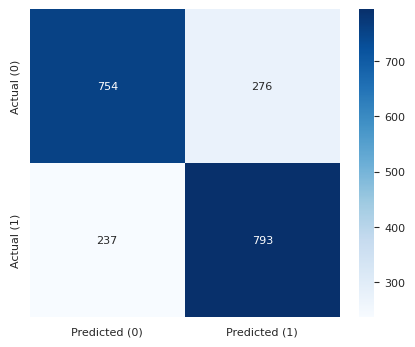

In [54]:
mlp_pred = mlp.predict(X_test)
ann_fnr, ann_fpr = plot_conf_matrix(y_test, mlp_pred, "ANN")

In [55]:
print(classification_report(y_test, mlp_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1030
           1       0.74      0.77      0.76      1030

    accuracy                           0.75      2060
   macro avg       0.75      0.75      0.75      2060
weighted avg       0.75      0.75      0.75      2060



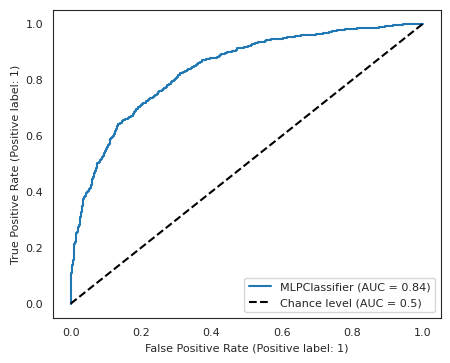

In [56]:
mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test, y_test, plot_chance_level=True)

## Ensemble (Boosting (XGBoost))

In [57]:
from xgboost import XGBClassifier

param_grid = {'n_estimators': [25, 50, 100]}

xgboost = XGBClassifier(max_depth=10, objective="binary:logistic")
xg_gscv = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=cross_val, verbose=vbose)
xg_gscv.fit(X_train, y_train)

xgboost.fit(X_train, y_train)

xg_gscv.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


{'n_estimators': 100}

In [58]:
print("{:,.2f}".format(xgboost.score(X_test, y_test)))

0.91


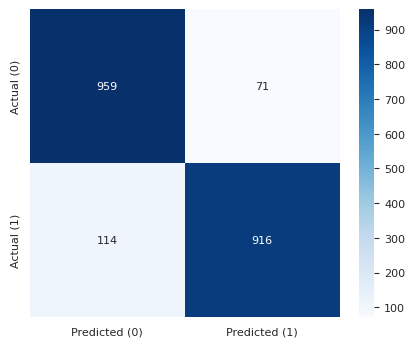

In [59]:
xg_pred = xgboost.predict(X_test)
xg_fnr, xg_fpr = plot_conf_matrix(y_test, xg_pred, "XGBoost")

In [60]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1030
           1       0.93      0.89      0.91      1030

    accuracy                           0.91      2060
   macro avg       0.91      0.91      0.91      2060
weighted avg       0.91      0.91      0.91      2060



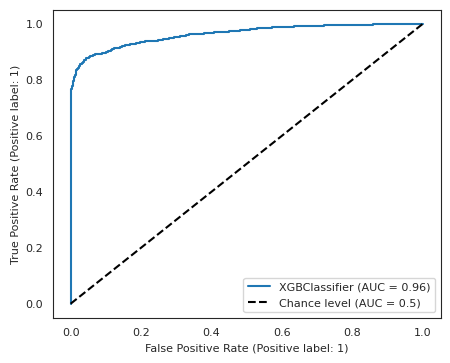

In [61]:
xg_disp = RocCurveDisplay.from_estimator(xgboost, X_test, y_test, plot_chance_level=True)

## Ensemble (Voting)

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

svm_v = SVC(kernel='rbf', probability=True)
knn_v = KNeighborsClassifier(n_neighbors=1)
rf_v  = RandomForestClassifier(random_state=42)

ens_clf = VotingClassifier(estimators = [('svm_v', svm_v), ('knn_v', knn_v), ('rf_v', rf_v)], voting='soft')
ens_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm_v', SVC(probability=True)),
                             ('knn_v', KNeighborsClassifier(n_neighbors=1)),
                             ('rf_v', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [63]:
print("{:,.2f}".format(ens_clf.score(X_test, y_test)))

0.85


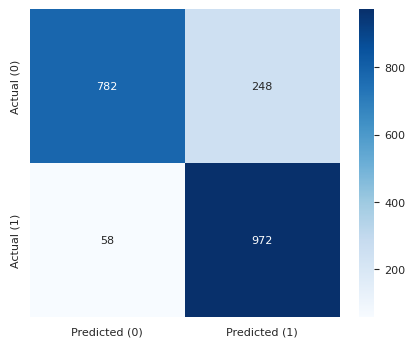

In [64]:
ens_clf_pred = ens_clf.predict(X_test)
vot_fnr, vot_fpr = plot_conf_matrix(y_test, ens_clf_pred, "Voting")

In [65]:
print(classification_report(y_test, ens_clf_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1030
           1       0.80      0.94      0.86      1030

    accuracy                           0.85      2060
   macro avg       0.86      0.85      0.85      2060
weighted avg       0.86      0.85      0.85      2060



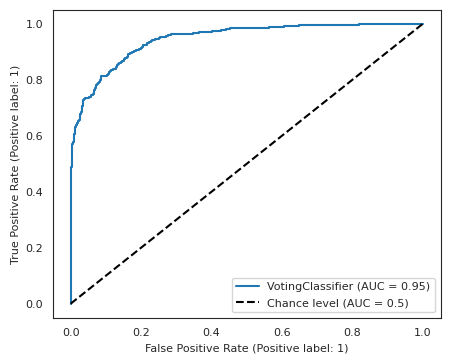

In [66]:
ens_clf_disp = RocCurveDisplay.from_estimator(ens_clf, X_test, y_test, plot_chance_level=True)

## Ensemble (Stacking)

In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

base_learners = [
    ('rf_b', RandomForestClassifier(random_state=42)),
    ('svm_b', SVC(kernel='rbf', probability=True)),
    ('knn_b', KNeighborsClassifier(n_neighbors=1))
]

stack_clf = StackingClassifier(estimators=base_learners, final_estimator=make_pipeline(LogisticRegression()))
stack_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_b',
                                RandomForestClassifier(random_state=42)),
                               ('svm_b', SVC(probability=True)),
                               ('knn_b', KNeighborsClassifier(n_neighbors=1))],
                   final_estimator=Pipeline(steps=[('logisticregression',
                                                    LogisticRegression())]))

In [68]:
print("{:,.2f}".format(stack_clf.score(X_test, y_test)))

0.93


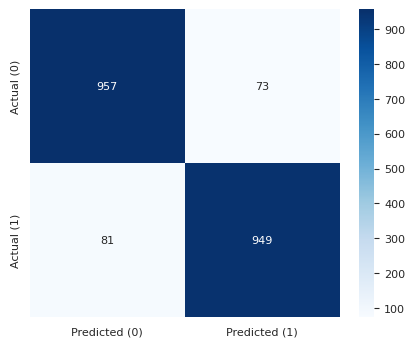

In [69]:
stack_clf_pred = stack_clf.predict(X_test)
stack_fnr, stack_fpr = plot_conf_matrix(y_test, stack_clf_pred, "Stacking")

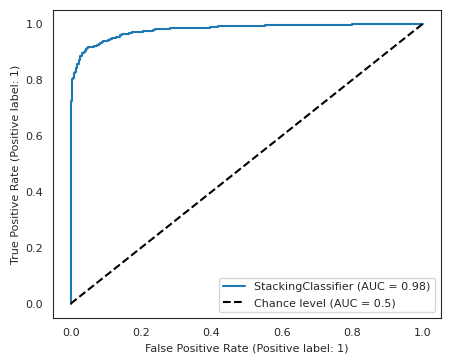

In [70]:
stack_clf_disp = RocCurveDisplay.from_estimator(stack_clf, X_test, y_test, plot_chance_level=True)

## 4. Results: Model Interpretability (Shapley Values)

In [71]:
import shap
shap.initjs()

explainer = shap.Explainer(forest)
shap_values = explainer(X_train[:])

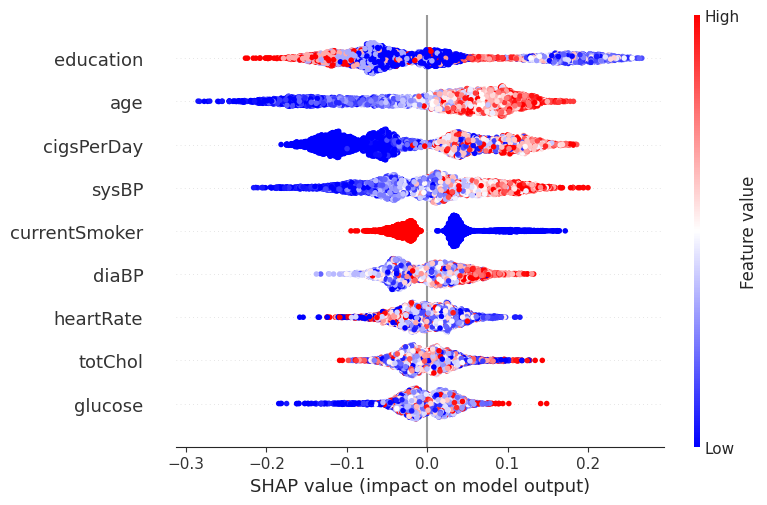

In [72]:
shap.summary_plot(shap_values[:,:,1], X_train, max_display=9, show=False, cmap=plt.get_cmap("bwr"))
plt.savefig("CHDshap.png", dpi=150)
plt.show()

## 4. Results: Model Training

In [74]:
pd.options.display.float_format = '{:,.3f}'.format

lr_acc, lr_f1, lr_auc = get_scores(logreg, X_test, y_test, logreg_pred)
knn_acc, knn_f1, knn_auc = get_scores(knn, X_test, y_test, knn_pred)
rf_acc, rf_f1, rf_auc = get_scores(forest, X_test, y_test, rf_pred)
svm_acc, svm_f1, svm_auc = get_scores(svm, X_test, y_test, svm_pred)
xg_acc, xg_f1, xg_auc = get_scores(xgboost, X_test, y_test, xg_pred)
mlp_acc, mlp_f1, mlp_auc = get_scores(mlp, X_test, y_test, mlp_pred)

ens_clf_acc, ens_clf_f1, ens_clf_auc = get_scores(ens_clf, X_test, y_test, ens_clf_pred)
stack_clf_acc, stack_clf_f1, stack_clf_auc = get_scores(stack_clf, X_test, y_test, stack_clf_pred)

score_table = pd.DataFrame({
    "Logistic regression":{'Accuracy':lr_acc, 'AUC':lr_auc, 'F1 score':lr_f1, 'FNR': lr_fnr, 'FPR': lr_fpr},
    "Support vector machine":{'Accuracy':svm_acc, 'AUC':svm_auc, 'F1 score':svm_f1, 'FNR': svm_fnr, 'FPR': svm_fpr},
    "K-nearest neighbors":{'Accuracy':knn_acc, 'AUC':knn_auc, 'F1 score':knn_f1, 'FNR': knn_fnr, 'FPR': knn_fpr},
    "Artificial Neural Network":{'Accuracy':mlp_acc, 'AUC':mlp_auc, 'F1 score':mlp_f1, 'FNR': ann_fnr, 'FPR': ann_fpr},
    "Random forest":{'Accuracy':rf_acc, 'AUC':rf_auc, 'F1 score':rf_f1, 'FNR': rf_fnr, 'FPR': rf_fpr},
    "Ensemble (Boosting)":{'Accuracy':xg_acc, 'AUC':xg_auc, 'F1 score':xg_f1, 'FNR': xg_fnr, 'FPR': xg_fpr},
    "Ensemble (Voting)":{'Accuracy':ens_clf_acc, 'AUC':ens_clf_auc, 'F1 score':ens_clf_f1, 'FNR': vot_fnr, 'FPR': vot_fpr},
    "Ensemble (Stacking)":{'Accuracy':stack_clf_acc, 'AUC':stack_clf_auc, 'F1 score':stack_clf_f1, 'FNR': stack_fnr, 'FPR': stack_fpr},
}).T

score_table

Accuracy   AUC  F1 score   FNR   FPR
Logistic regression           0.671 0.733     0.674 0.320 0.338
Support vector machine        0.733 0.817     0.744 0.224 0.310
K-nearest neighbors           0.763 0.856     0.794 0.086 0.387
Artificial Neural Network     0.751 0.837     0.756 0.230 0.268
Random forest                 0.916 0.971     0.914 0.103 0.066
Ensemble (Boosting)           0.910 0.962     0.908 0.111 0.069
Ensemble (Voting)             0.851 0.945     0.864 0.056 0.241
Ensemble (Stacking)           0.925 0.979     0.925 0.079 0.071